#### authors: Rafael Dousse, Eva Ray, Massimo Stefani

# Exercice 1 - Digit classification system using different SVM classifiers

## Imports

In [1]:
import gzip
import _pickle as cPickle

# Add your imports here
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [ ]:
# Uncomment the following line if you need to install scikit-image
# !pip install scikit-image

## Exercise's steps

The objective of this exercise is to build a classification system able to classify the images of handwritten digits (0–9) coming from the MNIST database and using SVM with different types of kernels (linear, polynomial, RBF, ...). For that purpose, you will use the SVM library available in [_Scikit-learn_](http://scikit-learn.org).

### a. Getting the training and test sample sets from the MNIST database

#### a) Load MNIST digit dataset

In [2]:
# Load training, validation (not used in the PW) and test datasets
with gzip.open("mnist.pkl.gz", "rb") as f:
    train_set, valid_set, test_set = cPickle.load(f, encoding="latin1")

# Print the shape of the various datasets
print("Training set:", len(train_set[0]))
print("Validation set:", len(valid_set[0]))
print("Test set:", len(test_set[0]))

Training set: 50000
Validation set: 10000
Test set: 10000


#### b) Visualize (plot) the images of some digits of the MNIST database

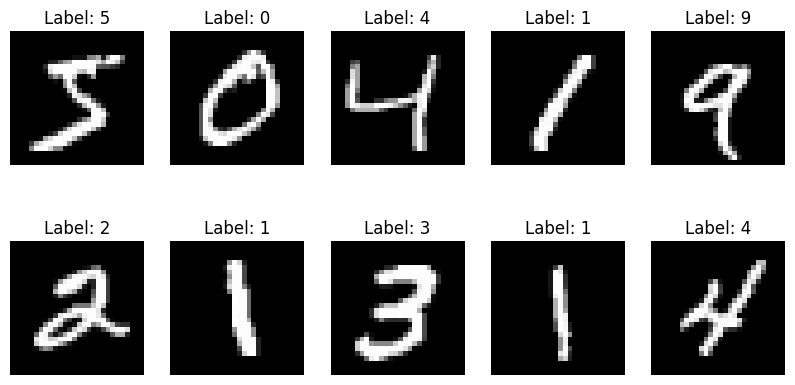

In [3]:
X_train, y_train = train_set

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray') # Reshape to 28x28 for visualization
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


#### c) Build the final training and test sets, which should be balanced

In [4]:
X_test, y_test = test_set

In [5]:
# Analyze the distribution of digit classes in the training and test sets to choose the number of
# samples per class

train_counter = Counter(y_train)
test_counter = Counter(y_test)

classes = sorted(set(train_counter.keys()) | set(test_counter.keys()))

print(f"{'Classe':>6}  {'Train':>6}  {'Test':>6}")
print("-" * 26)
for cls in classes:
    print(f"{cls:6}  {train_counter.get(cls, 0):6}  {test_counter.get(cls, 0):6}")


Classe   Train    Test
--------------------------
     0    4932     980
     1    5678    1135
     2    4968    1032
     3    5101    1010
     4    4859     982
     5    4506     892
     6    4951     958
     7    5175    1028
     8    4842     974
     9    4988    1009


In [6]:
# We wanted to choose the biggest number of samples per class possible to have balanced datasets and 30% -70% train-test split but the training took too long so we reduced the number of samples per class.

nb_train = 280 # 70%
nb_test = 120 # 30%

X_train_balanced = []
y_train_balanced = []
X_test_balanced = []
y_test_balanced = []

for cls in classes:
    # Get indices of samples belonging to the current class
    train_indices = np.where(y_train == cls)[0][:nb_train]
    test_indices = np.where(y_test == cls)[0][:nb_test]

    # shuffle the indices to ensure randomness
    np.random.shuffle(train_indices)
    np.random.shuffle(test_indices)

    # Append the selected samples to the balanced datasets
    X_train_balanced.append(X_train[train_indices])
    y_train_balanced.append(y_train[train_indices])
    X_test_balanced.append(X_test[test_indices])
    y_test_balanced.append(y_test[test_indices])

# Stack the lists into numpy arrays
X_train_balanced = np.vstack(X_train_balanced)
y_train_balanced = np.hstack(y_train_balanced)
X_test_balanced = np.vstack(X_test_balanced)
y_test_balanced = np.hstack(y_test_balanced)

print("Final shapes:")
print("X_train_balanced:", X_train_balanced.shape)
print("y_train_balanced:", np.bincount(y_train_balanced))
print("X_test_balanced:", X_test_balanced.shape)
print("y_test_balanced:", np.bincount(y_test_balanced))


Final shapes:
X_train_balanced: (2800, 784)
y_train_balanced: [280 280 280 280 280 280 280 280 280 280]
X_test_balanced: (1200, 784)
y_test_balanced: [120 120 120 120 120 120 120 120 120 120]


### b. Classification of digits based on raw pixel values using SVM and different kernels

Create, train and test several SVM classifiers with different kernels (linear, polynomial, RBF, ...). For the training, perform a cross-validation using 10 folds, and test different with several $C$ and kernel parameter values (e.g. for $\gamma$ for RBF kernel) in order to get the best classifier. After the test, display the classification performances and confusion matrix of each SVM classifier (see class _metrics_).

In [7]:
nb_folds = 10
c = [0.1, 1, 10, 100]
gamma = [0.1, 0.01, 0.001]

parameters = [
    {'kernel': ['linear'], 'C': c},
    {'kernel': ['poly'], 'C': c, 'degree': [2, 3], 'gamma': gamma, 'coef0': [0.0, 0.1]},
    {'kernel': ['rbf'], 'C': c, 'gamma': gamma},
    {'kernel': ['sigmoid'], 'C': c, 'gamma': gamma, 'coef0': [0.0, 0.1]}
]


Best parameters for linear kernel: {'C': 0.1, 'kernel': 'linear'}
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       120
           1       0.91      0.99      0.95       120
           2       0.87      0.88      0.87       120
           3       0.87      0.82      0.85       120
           4       0.88      0.93      0.91       120
           5       0.82      0.87      0.84       120
           6       0.95      0.88      0.91       120
           7       0.87      0.88      0.87       120
           8       0.86      0.74      0.80       120
           9       0.84      0.84      0.84       120

    accuracy                           0.88      1200
   macro avg       0.88      0.88      0.88      1200
weighted avg       0.88      0.88      0.88      1200

Best cross-validation score: 0.9200000000000002


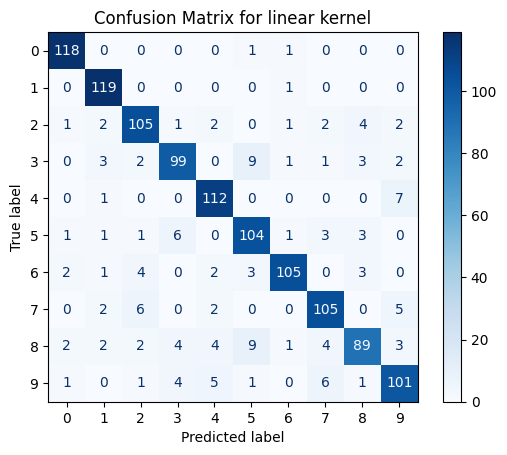

Best parameters for poly kernel: {'C': 0.1, 'coef0': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       120
           1       0.95      0.99      0.97       120
           2       0.94      0.92      0.93       120
           3       0.93      0.86      0.89       120
           4       0.88      0.94      0.91       120
           5       0.90      0.93      0.91       120
           6       0.97      0.93      0.95       120
           7       0.90      0.91      0.90       120
           8       0.88      0.85      0.86       120
           9       0.93      0.88      0.91       120

    accuracy                           0.92      1200
   macro avg       0.92      0.92      0.92      1200
weighted avg       0.92      0.92      0.92      1200

Best cross-validation score: 0.9385714285714286


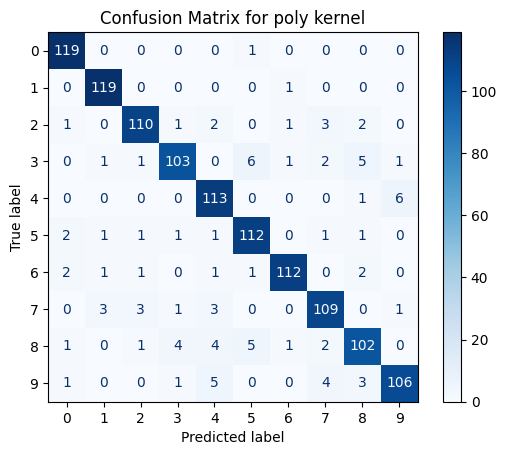

Best parameters for rbf kernel: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       120
           1       0.98      0.99      0.98       120
           2       0.93      0.93      0.93       120
           3       0.92      0.87      0.89       120
           4       0.90      0.93      0.92       120
           5       0.90      0.96      0.93       120
           6       0.99      0.93      0.96       120
           7       0.91      0.92      0.91       120
           8       0.91      0.89      0.90       120
           9       0.91      0.88      0.89       120

    accuracy                           0.93      1200
   macro avg       0.93      0.93      0.93      1200
weighted avg       0.93      0.93      0.93      1200

Best cross-validation score: 0.9435714285714287


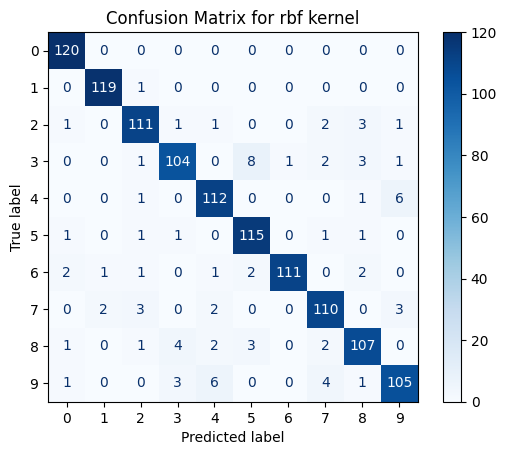

Best parameters for sigmoid kernel: {'C': 100, 'coef0': 0.0, 'gamma': 0.001, 'kernel': 'sigmoid'}
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       120
           1       0.91      0.99      0.95       120
           2       0.87      0.88      0.87       120
           3       0.87      0.82      0.84       120
           4       0.88      0.93      0.91       120
           5       0.81      0.87      0.84       120
           6       0.95      0.88      0.91       120
           7       0.87      0.88      0.87       120
           8       0.86      0.74      0.80       120
           9       0.84      0.84      0.84       120

    accuracy                           0.88      1200
   macro avg       0.88      0.88      0.88      1200
weighted avg       0.88      0.88      0.88      1200

Best cross-validation score: 0.9196428571428573


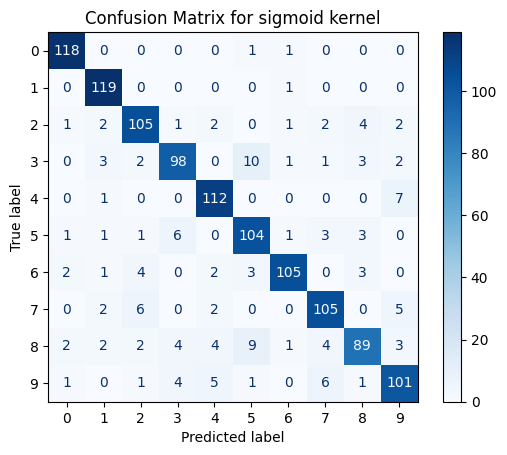

In [8]:

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
best_classifier = None
best_score = 0

for param in parameters:
    svc = svm.SVC()
    # allows to give multiple parameters to test in GridSearchCV
    clf = GridSearchCV(svc, param, cv=nb_folds, n_jobs=-1)
    clf.fit(X_train_balanced, y_train_balanced)

    print(f"Best parameters for {param['kernel'][0]} kernel: {clf.best_params_}")

    y_pred = clf.predict(X_test_balanced)

    print("Classification Report:")
    print(classification_report(y_test_balanced, y_pred))
    print("Best cross-validation score:", clf.best_score_)

    ConfusionMatrixDisplay.from_predictions(y_test_balanced, y_pred, display_labels=classes, cmap='Blues')
    plt.title(f"Confusion Matrix for {param['kernel'][0]} kernel")
    plt.show()

    if clf.best_score_ > best_score:
        best_score = clf.best_score_
        best_classifier = clf


### c. (Optional) Impact of preprocessing and feature extraction

Analyse the impact of the classification performances using the following preprocessing and feature extraction steps:

#### a) Preprocessing step: convert images to binary (i.e. black and white) representations

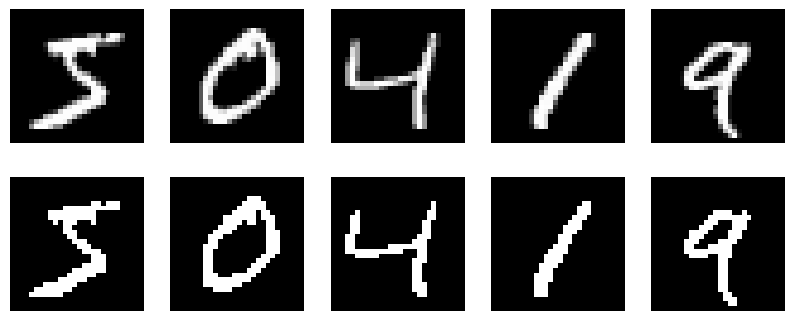

In [11]:
# Your code here

# Preprocessing: Convert to binary
threshold = 0.5
X_train_binary = (X_train > threshold).astype(float)
X_test_binary = (X_test > threshold).astype(float)

# Visualize
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.subplot(2, 5, i+6)
    plt.imshow(X_train_binary[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

#### b) Feature extraction steps:
* Horizontal and vertical projections (i.e. compute the sum of grey pixel values along the the X and Y-axis)
* Local binary patterns
* Any other usable image features that you may have found

In [ ]:
# Your code here

from skimage.feature import local_binary_pattern
from joblib import Parallel, delayed

def extract_hv_projections(X_bin):
    # X_bin : (N, 784) avec valeurs 0/1
    imgs = X_bin.reshape(-1, 28, 28)
    h = imgs.sum(axis=2)
    v = imgs.sum(axis=1)
    return np.hstack([h, v]).astype(np.float32)

def histogramme_lbp(images):
    # Compute uniform LBP for an image
    lbp = local_binary_pattern(images, P=8, R=1, method='uniform')
    # Compute histogram of LBP
    hist, _ = np.histogram(lbp.ravel(), bins=59, range=(0, 59), density=True)
    # return histogram as float32
    return hist.astype(np.float32)

def extract_lbp_parallel(images, n_jobs=-1):
    # convert float images to uint8 images 
    imgs_u8 = (images.reshape(-1, 28, 28) * 255).astype(np.uint8)
    # apply LBP extraction in parallel using joblib so that extraction is faster
    feats = Parallel(n_jobs=n_jobs, prefer="threads")(
        delayed(histogramme_lbp)(img) for img in imgs_u8
    )
    return np.vstack(feats)

def make_binary(images, threshold=0.5):
    """
    Convert grayscale images to binary using a threshold.
    """
    return (images > threshold).astype(np.uint8)

def evaluate_variant(name, X_train, y_train, X_test, y_test):
    print(f"\n{'='*40}")
    print(f"Testing: {name}")
    print('='*40)

    best_classifier = None
    best_score = 0

    for param in parameters:
        svc = svm.SVC()
        clf = GridSearchCV(svc, param, cv=nb_folds, n_jobs=-1)
        clf.fit(X_train, y_train)

        print(f"\nKernel: {param['kernel'][0]}")
        print(f"Best params: {clf.best_params_}")
        print(f"CV score: {clf.best_score_:.4f}")

        if clf.best_score_ > best_score:
            best_score = clf.best_score_
            best_classifier = clf

    # Prédiction et rapport
    y_pred = best_classifier.predict(X_test)
    print(f"\n{name} - BEST SCORE: {best_score:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    return best_score


In [16]:
X_train_binary = make_binary(X_train_balanced)
X_test_binary = make_binary(X_test_balanced)

X_train_proj = extract_hv_projections(X_train_binary)
X_test_proj = extract_hv_projections(X_test_binary)

X_train_lbp = extract_lbp_parallel(X_train_balanced)
X_test_lbp = extract_lbp_parallel(X_test_balanced)



Testing: Binary Images

Kernel: linear
Best params: {'C': 0.1, 'kernel': 'linear'}
CV score: 0.9007

Kernel: poly
Best params: {'C': 0.1, 'coef0': 0.0, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
CV score: 0.9307

Kernel: rbf
Best params: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
CV score: 0.9357

Kernel: sigmoid
Best params: {'C': 10, 'coef0': 0.0, 'gamma': 0.001, 'kernel': 'sigmoid'}
CV score: 0.9057

Binary Images - BEST SCORE: 0.9357

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       120
           1       0.96      1.00      0.98       120
           2       0.92      0.90      0.91       120
           3       0.92      0.86      0.89       120
           4       0.92      0.93      0.93       120
           5       0.87      0.93      0.90       120
           6       0.97      0.92      0.94       120
           7       0.88      0.89      0.89       120
           8       0.89      0.88      0.88  

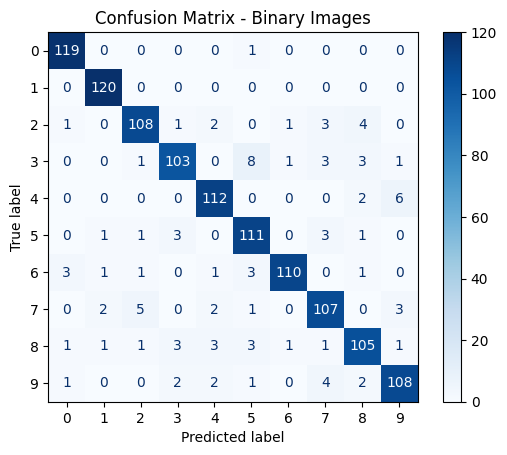

In [18]:
score_binary = evaluate_variant("Binary Images", X_train_binary, y_train_balanced, X_test_binary, y_test_balanced)


Testing: H/V Projections

Kernel: linear
Best params: {'C': 0.1, 'kernel': 'linear'}
CV score: 0.7925

Kernel: poly
Best params: {'C': 100, 'coef0': 0.1, 'degree': 3, 'gamma': 0.001, 'kernel': 'poly'}
CV score: 0.8393

Kernel: rbf
Best params: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
CV score: 0.8571

Kernel: sigmoid
Best params: {'C': 0.1, 'coef0': 0.1, 'gamma': 0.001, 'kernel': 'sigmoid'}
CV score: 0.4150

H/V Projections - BEST SCORE: 0.8571

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       120
           1       0.83      0.99      0.90       120
           2       0.90      0.76      0.82       120
           3       0.75      0.66      0.70       120
           4       0.88      0.83      0.86       120
           5       0.68      0.67      0.67       120
           6       0.91      0.89      0.90       120
           7       0.79      0.82      0.80       120
           8       0.77      0.77    

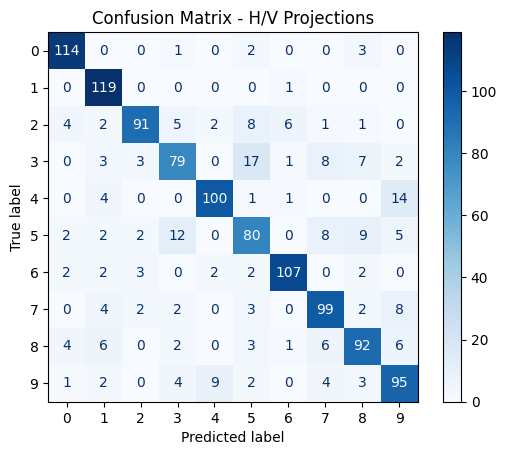

In [19]:
score_proj = evaluate_variant("H/V Projections", X_train_proj, y_train_balanced, X_test_proj, y_test_balanced)


Testing: LBP

Kernel: linear
Best params: {'C': 100, 'kernel': 'linear'}
CV score: 0.3643

Kernel: poly
Best params: {'C': 100, 'coef0': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
CV score: 0.2643

Kernel: rbf
Best params: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
CV score: 0.3293

Kernel: sigmoid
Best params: {'C': 100, 'coef0': 0.0, 'gamma': 0.1, 'kernel': 'sigmoid'}
CV score: 0.3079

LBP - BEST SCORE: 0.3643

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.47      0.41       120
           1       0.74      0.99      0.85       120
           2       0.17      0.03      0.06       120
           3       0.12      0.09      0.11       120
           4       0.33      0.22      0.26       120
           5       0.19      0.18      0.19       120
           6       0.11      0.03      0.04       120
           7       0.27      0.46      0.34       120
           8       0.45      0.53      0.49       120
           9

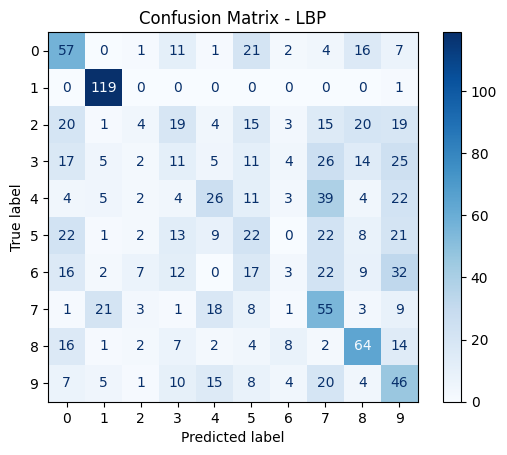

In [17]:
score_lbp = evaluate_variant("LBP", X_train_lbp, y_train_balanced, X_test_lbp, y_test_balanced)

### d. Analysis of the results

Analyse the results obtained with the best SVM classifier.

a) Which kernel and parameters were used?

Best kernels and parameters found:
- **Original images**: RBF kernel with C = 10, γ = 0.01 (best CV = 0.9475).
- **Binary images**: RBF kernel with C = 10, γ = 0.01 (best CV = 0.9357).
- **H/V projections**: RBF kernel with C = 10, γ = 0.001 (best CV = 0.8571).
- **LBP features**: linear kernel with C = 100 (best CV = 0.3643, but weak).

The best SVM classifier is the one that uses RBF kernel which classifies the best (except for LBP), indicating that a non-linear decision boundary is most suitable for these digit features.

b) Which digit classes are the best/worse recognized against which? Why?

The best recognized digits seen in this dataset are 0, 1 and 6, because their shapes are visually distinct and will vary little in handwriting. The worst recognized digits are 3, 5, 4 and 9, which share similar curves which make them more look alike, making them harder to separate with simple feature representations. In particular, 3 and 5 are often confused with each other, as are 4 and 9, probably because of their similar shapes in handwritten form.

**Raw grayscale images**, SVM achieves the highest accuracy because it receives the full information and can exploit all the textural and identify the differences between similar digits.

**Binary images** still perform well, but thresholding removes intensity information that sometimes helps recognize similar digits. It is still very similar to raw images because the shapes are preserved.

**Horizontal/Vertical projections** perform a little worse because they compress each image into two 1-D profiles, losing most spatial structure by calculating the sums and therefore making classes with similar outlines harder to separate.

**LBP features** perform the worst because LBP is a texture descriptor rather than a shape descriptor, digits do not have meaningful texture patterns, and LBP is sensitive to noise and small pixel variations, which leads to poor classification. More precisely, LBP focuses on local texture patterns, losing all spatial arrangement information that is crucial for digit recognition. It is really not a suitable feature for this classification task.

Overall, SVM works best with the raw images because they preserve the complete geometry of the digits, allowing the kernel to build a better decision boundary. All handcrafted feature transforms remove information, and therefore reduce SVM’s ability to recognize similar digit classes.


c) What is the impact of the sizes of the training and test sets on the classification performance?

A larger training set usually improves performance because the model learns from more examples, which leads to a better generalization. However, in addition to increasing the training time, a larger dataset may include more noise, which can make learning harder for the model. Furthermore, if the samples in a large training set are very similar to each other, the model may overfit to those specific examples and/or be of no help compared to a smaller but more diverse training set.

In the other case, if the test set is too small, performance estimates can become unreliable, depending on the specific samples chosen for testing and may not contain enough diverse examples of all classes to accurately train a robust model.

Here, we did not use the full MNIST dataset due to computational constraints. However, the performance we achieved with a smaller dataset (on raw data) was still very good. It is probably due to the fact that we used a perfectly balanced dataset, allowing the SVM to learn equally well from all digit classes. It is also likely that the SVM model is able to generalize well even with fewer samples because handwritten digits have relatively simple structures that can be captured with fewer examples.